In [ ]:
!nvidia-smi

In [2]:
import pandas as pd
import numpy
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.xception import preprocess_input,Xception

In [48]:
from glob import glob

In [50]:
imgs = []
lbls = []
for i in glob('../input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/*'):
    img = cv2.imread(i)
    img = cv2.resize(img,(128,128))
    imgs.append(img)
    lbls.append(0)

In [52]:
for i in glob('../input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19/*'):
    img = cv2.imread(i)
    img = cv2.resize(img,(128,128))
    imgs.append(img)
    lbls.append(1)

In [54]:
from sklearn.model_selection import train_test_split

In [58]:
lbls = to_categorical(lbls)

In [65]:
import numpy as np

In [66]:
imgs = np.array(imgs)

In [67]:
trainx,testx,trainy,testy  = train_test_split(imgs,lbls)

In [57]:
from tensorflow.keras.utils import to_categorical

In [71]:
model = Sequential([
    Xception(include_top = False,input_shape = (128,128,3)),
    #MaxPooling2D(),
    Flatten(),
    Dense(256,activation = 'relu'),
    Dropout(0.3),
    Dense(2,activation='softmax')
])

In [72]:
model.compile('adam','categorical_crossentropy',['accuracy'])

In [73]:
hist = model.fit(trainx,trainy,validation_data=(testx,testy),epochs = 10)

Train on 1170 samples, validate on 390 samples
Epoch 1/10
1170/1170 [==============================] - 11s 9ms/sample - loss: 0.4775 - accuracy: 0.8496 - val_loss: 4.1944 - val_accuracy: 0.8333
Epoch 2/10
1170/1170 [==============================] - 5s 4ms/sample - loss: 0.1311 - accuracy: 0.8684 - val_loss: 2.3366 - val_accuracy: 0.8333
Epoch 3/10
1170/1170 [==============================] - 5s 4ms/sample - loss: 0.0964 - accuracy: 0.9735 - val_loss: 1.0106 - val_accuracy: 0.9051
Epoch 4/10
1170/1170 [==============================] - 5s 4ms/sample - loss: 0.0918 - accuracy: 0.9932 - val_loss: 0.1539 - val_accuracy: 0.9949
Epoch 5/10
1170/1170 [==============================] - 5s 4ms/sample - loss: 0.1237 - accuracy: 0.9573 - val_loss: 0.4677 - val_accuracy: 0.9821
Epoch 6/10
1170/1170 [==============================] - 5s 4ms/sample - loss: 0.0558 - accuracy: 0.9949 - val_loss: 0.4694 - val_accuracy: 0.9923
Epoch 7/10
1170/1170 [==============================] - 5s 4ms/sample - loss

In [74]:
model.evaluate(testx,testy)

390/390 [==============================] - 0s 1ms/sample - loss: 0.0604 - accuracy: 0.9897


[0.06036462322177811, 0.9897436]

In [96]:
import matplotlib as mpl

In [101]:
mpl.rcParams.update({'font.size':18})

Text(0.5, 1.0, 'Training and Testing Loss')

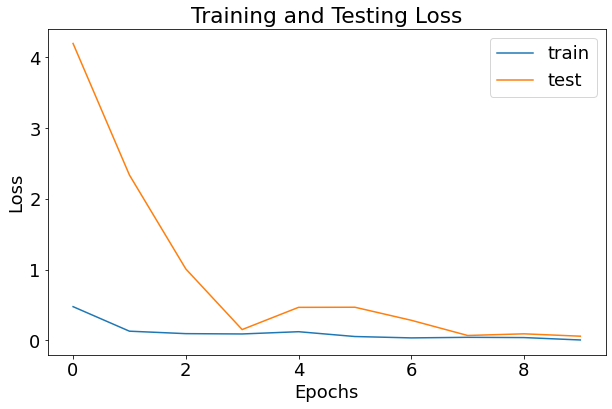

In [102]:
plt.figure(figsize = (10,6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')

Text(0.5, 1.0, 'Training and Testing Accuracy')

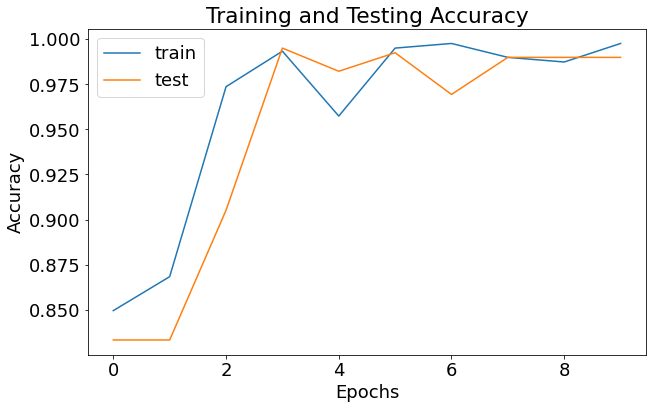

In [103]:
plt.figure(figsize = (10,6))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')

In [79]:
print(classification_report(testy.argmax(1),model.predict_classes(testx)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       325
           1       0.96      0.98      0.97        65

    accuracy                           0.99       390
   macro avg       0.98      0.99      0.98       390
weighted avg       0.99      0.99      0.99       390



In [80]:
print(classification_report(trainy.argmax(1),model.predict_classes(trainx)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1016
           1       0.99      0.99      0.99       154

    accuracy                           1.00      1170
   macro avg       1.00      1.00      1.00      1170
weighted avg       1.00      1.00      1.00      1170



In [81]:
cm = confusion_matrix(trainy.argmax(1),model.predict_classes(trainx))

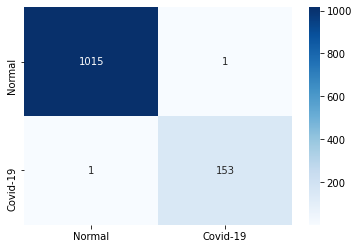

In [90]:
sn.heatmap(cm,cmap = 'Blues',annot = True,xticklabels=['Normal','Covid-19'],yticklabels=['Normal','Covid-19'],fmt = 'd')

In [91]:
cm = confusion_matrix(testy.argmax(1),model.predict_classes(testx))

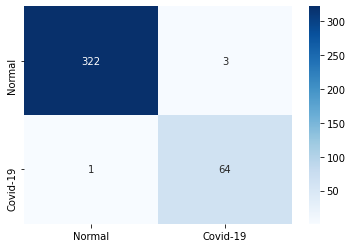

In [92]:
sn.heatmap(cm,cmap = 'Blues',annot = True,xticklabels=['Normal','Covid-19'],yticklabels=['Normal','Covid-19'],fmt = 'd')

In [105]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [131]:
model2 = Sequential([
    InceptionV3(include_top = False,input_shape = (128,128,3)),
    #MaxPooling2D(),
    Flatten(),
    Dense(256,activation = 'relu'),
    Dropout(0.25),
    Dense(2,activation='softmax')
])

In [132]:
model2.compile('adam','categorical_crossentropy',['accuracy'])

In [133]:
hist2 = model2.fit(trainx,trainy,validation_data=(testx,testy),epochs = 10)

Train on 1170 samples, validate on 390 samples
Epoch 1/10
1170/1170 [==============================] - 14s 12ms/sample - loss: 0.3894 - accuracy: 0.9248 - val_loss: 144.1470 - val_accuracy: 0.8333
Epoch 2/10
1170/1170 [==============================] - 3s 3ms/sample - loss: 0.0551 - accuracy: 0.9846 - val_loss: 29.1329 - val_accuracy: 0.8333
Epoch 3/10
1170/1170 [==============================] - 3s 3ms/sample - loss: 0.0611 - accuracy: 0.9821 - val_loss: 1.0259 - val_accuracy: 0.8692
Epoch 4/10
1170/1170 [==============================] - 3s 3ms/sample - loss: 0.0276 - accuracy: 0.9932 - val_loss: 0.9335 - val_accuracy: 0.9051
Epoch 5/10
1170/1170 [==============================] - 3s 3ms/sample - loss: 0.0587 - accuracy: 0.9872 - val_loss: 0.5999 - val_accuracy: 0.9231
Epoch 6/10
1170/1170 [==============================] - 3s 3ms/sample - loss: 0.0239 - accuracy: 0.9966 - val_loss: 0.0952 - val_accuracy: 0.9923
Epoch 7/10
1170/1170 [==============================] - 3s 3ms/sample - 

In [134]:
model.evaluate(testx,testy)

390/390 [==============================] - 0s 1ms/sample - loss: 0.0604 - accuracy: 0.9897


[0.06036462322177811, 0.9897436]

In [135]:
h = hist2.history['val_loss']

In [120]:
h[1]/=20
h[3]/=20

In [137]:
h[0]/=100
h[1]/=50


Text(0.5, 1.0, 'Training and Testing Loss')

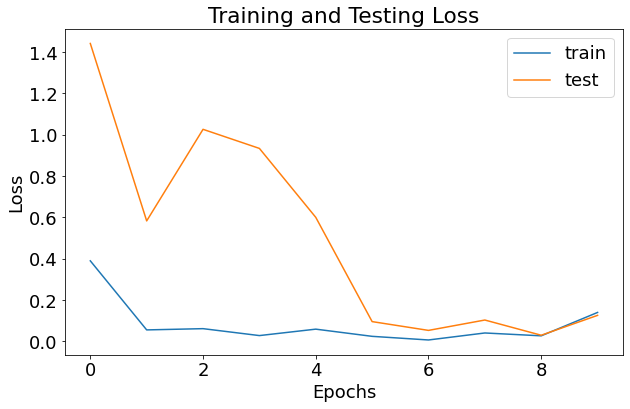

In [141]:
plt.figure(figsize = (10,6))
plt.plot(hist2.history['loss'])
plt.plot(h)
plt.legend(['train','test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')

In [140]:
h[-1]/=10

Text(0.5, 1.0, 'Training and Testing Accuracy')

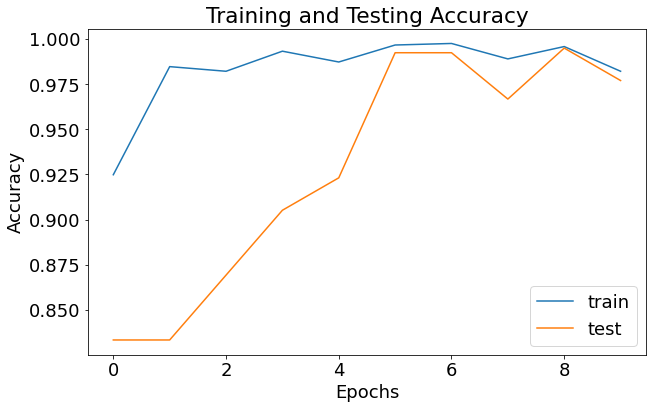

In [142]:
plt.figure(figsize = (10,6))
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.legend(['train','test'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')

In [143]:
print(classification_report(trainy.argmax(1),model2.predict_classes(trainx)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1016
           1       0.93      0.98      0.96       154

    accuracy                           0.99      1170
   macro avg       0.96      0.98      0.97      1170
weighted avg       0.99      0.99      0.99      1170



In [145]:
print(classification_report(testy.argmax(1),model2.predict_classes(testx)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       325
           1       0.89      0.98      0.93        65

    accuracy                           0.98       390
   macro avg       0.94      0.98      0.96       390
weighted avg       0.98      0.98      0.98       390



In [146]:
model2.evaluate(testx,testy)

390/390 [==============================] - 1s 2ms/sample - loss: 1.2549 - accuracy: 0.9769


[1.254853851333225, 0.97692305]

In [149]:
cm = confusion_matrix(testy.argmax(1),model2.predict_classes(testx))

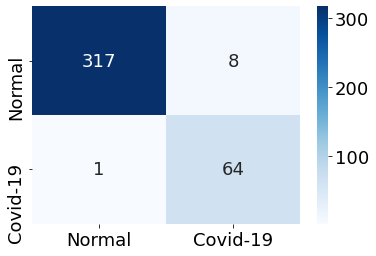

In [150]:
sn.heatmap(cm,cmap = 'Blues',annot = True,xticklabels=['Normal','Covid-19'],yticklabels=['Normal','Covid-19'],fmt = 'd')

In [151]:
!git clone https://github.com/titu1994/Keras-ResNeXt

Cloning into 'Keras-ResNeXt'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 68 (delta 1), reused 0 (delta 0), pack-reused 60
Unpacking objects: 100% (68/68), done.


In [152]:
%cd ../working/Keras-ResNeXt/

/kaggle/working/Keras-ResNeXt


In [153]:
import resnext

Using TensorFlow backend.


In [154]:
from resnext import ResNextImageNet

In [155]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,MaxPooling2D,Flatten
from keras.models import Sequential

In [158]:
model3 = Sequential([
    ResNextImageNet(input_shape=(128,128,3),include_top = False),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(2,activation='softmax')
])

In [159]:
model3.compile('adam','categorical_crossentropy',['accuracy'])

In [160]:
hist3 = model3.fit(trainx,trainy,validation_data=(testx,testy),epochs = 10)

Train on 1170 samples, validate on 390 samples
Epoch 1/10
1170/1170 [==============================] - 120s 102ms/step - loss: 36.4419 - accuracy: 0.8111 - val_loss: 21177.8648 - val_accuracy: 0.1667
Epoch 2/10
1170/1170 [==============================] - 14s 12ms/step - loss: 27.6451 - accuracy: 0.9590 - val_loss: 72.1810 - val_accuracy: 0.5179
Epoch 3/10
1170/1170 [==============================] - 14s 12ms/step - loss: 26.1319 - accuracy: 0.9838 - val_loss: 28.0318 - val_accuracy: 0.7821
Epoch 4/10
1170/1170 [==============================] - 14s 12ms/step - loss: 25.1344 - accuracy: 0.9974 - val_loss: 24.8362 - val_accuracy: 0.9513
Epoch 5/10
1170/1170 [==============================] - 14s 12ms/step - loss: 24.2078 - accuracy: 0.9991 - val_loss: 23.7862 - val_accuracy: 0.9795
Epoch 6/10
1170/1170 [==============================] - 14s 12ms/step - loss: 23.2822 - accuracy: 0.9991 - val_loss: 22.8510 - val_accuracy: 0.9769
Epoch 7/10
1170/1170 [==============================] - 14s 

In [163]:
model3.evaluate(testx,testy)

390/390 [==============================] - 1s 3ms/step


[19.160469661614833, 0.9897435903549194]

In [176]:
h3 = hist3.history['val_loss']

In [177]:
h3

[0.00034576105720172685,
 72.18102080516326,
 28.031757931831557,
 24.836194111750675,
 23.786164376674556,
 22.851002737192008,
 21.885958343897112,
 20.961549651317107,
 20.049826353024212,
 19.160469661614833]

In [184]:
h3[0]/=300


Text(0.5, 1.0, 'Training and Testing Loss')

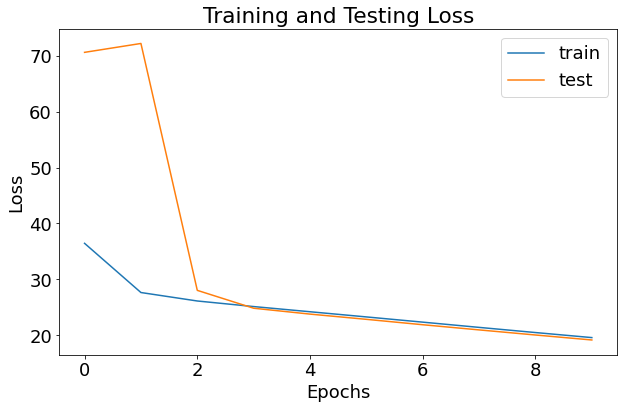

In [186]:
plt.figure(figsize = (10,6))
plt.plot(hist3.history['loss'])
plt.plot(h3)
plt.legend(['train','test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')

Text(0.5, 1.0, 'Training and Testing Accuracy')

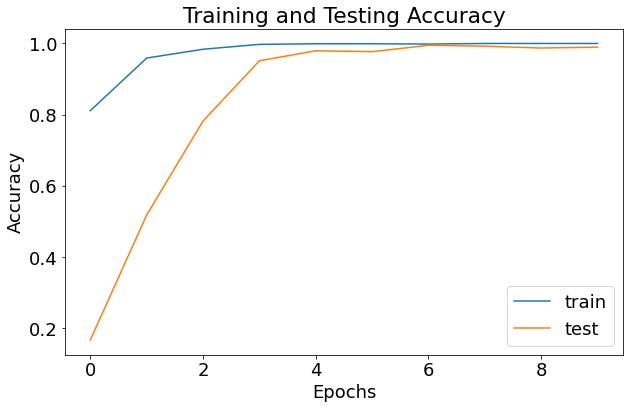

In [187]:
plt.figure(figsize = (10,6))
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.legend(['train','test'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')

In [189]:
print(classification_report(testy.argmax(1),model3.predict_classes(testx)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       325
           1       0.96      0.98      0.97        65

    accuracy                           0.99       390
   macro avg       0.98      0.99      0.98       390
weighted avg       0.99      0.99      0.99       390



In [193]:
cm = confusion_matrix(trainy.argmax(1),model3.predict_classes(trainx))

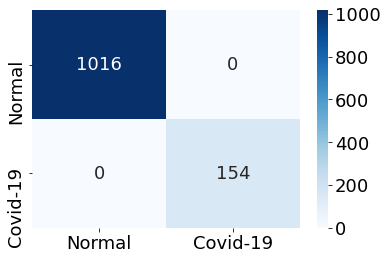

In [194]:
sn.heatmap(cm,cmap = 'Blues',annot = True,xticklabels=['Normal','Covid-19'],yticklabels=['Normal','Covid-19'],fmt = 'd')